Student Name: Yong Hen Tan

Student Number: 22273433

# Tasks

Ensure that you have:

- ~~encoded all categorical attributes as numerical~~
- ~~filled in all missing values~~
- ~~applied a scaler to rescale features~~
- ~~treated outliers appropriately~~
- created at least one new feature from the existing ones



In [347]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("./bank.csv")
df.tail(10)

age           job   marital  education default  balance housing loan  \
1990  36.0    technician   married   tertiary      no      376      no   no   
1991  39.0        admin.  divorced  secondary      no      112      no   no   
1992  78.0       retired  divorced    primary      no      527      no   no   
1993  35.0    management   married        NaN      no     2326     yes  yes   
1994  26.0       student    single  secondary      no      655      no   no   
1995  20.0       student    single        NaN      no     2785      no   no   
1996  28.0        admin.    single  secondary      no      127      no   no   
1997  81.0       retired   married    primary      no     1154      no   no   
1998  46.0      services   married    primary      no     4343     yes   no   
1999  40.0  entrepreneur   married  secondary      no     6403      no   no   

        contact  day month  duration  campaign  pdays  previous poutcome  \
1990   cellular   16   sep       173         1     -1         0      NaN   
1991   cellular   16   sep       574         3     -1         0      NaN   
1992   cellular   16   sep       193         1     -1         0      NaN   
1993   cellular   16   sep       319         1     -1         0      NaN   
1994   cellular   16   sep       190         1     -1         0      NaN   
1995   cellular   16   sep       327         2     -1         0      NaN   
1996   cellular   16   sep      1334         2     -1         0      NaN   
1997  telephone   17   sep       231         1     -1         0      NaN   
1998        NaN   20   sep       185         1     -1         0      NaN   
1999   cellular   22   sep       208         2     -1         0      NaN   

     subscribed  
1990        yes  
1991        yes  
1992        yes  
1993        yes  
1994        yes  
1995        yes  
1996        yes  
1997        yes  
1998        yes  
1999        yes

In [348]:
df.isna().sum()

age            12
job            10
marital         0
education     104
default         0
balance         0
housing         0
loan            0
contact       191
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome      454
subscribed      0
dtype: int64

In [349]:
original_df = df.copy()
original_df

age           job   marital  education default  balance housing loan  \
0     32.0    technician    single   tertiary      no      392     yes   no   
1     39.0    technician  divorced  secondary      no      688     yes  yes   
2     59.0       retired   married  secondary      no     1035     yes  yes   
3     47.0   blue-collar   married  secondary      no      398     yes  yes   
4     54.0       retired   married  secondary      no     1004     yes   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
1995  20.0       student    single        NaN      no     2785      no   no   
1996  28.0        admin.    single  secondary      no      127      no   no   
1997  81.0       retired   married    primary      no     1154      no   no   
1998  46.0      services   married    primary      no     4343     yes   no   
1999  40.0  entrepreneur   married  secondary      no     6403      no   no   

        contact  day month  duration  campaign  pdays  previous poutcome  \
0      cellular    1   apr       957         2    131         2  failure   
1      cellular    1   apr       233         2    133         1  failure   
2      cellular    1   apr       126         2    239         1  failure   
3      cellular    1   apr       274         1    238         2  failure   
4      cellular    1   apr       479         1    307         1  failure   
...         ...  ...   ...       ...       ...    ...       ...      ...   
1995   cellular   16   sep       327         2     -1         0      NaN   
1996   cellular   16   sep      1334         2     -1         0      NaN   
1997  telephone   17   sep       231         1     -1         0      NaN   
1998        NaN   20   sep       185         1     -1         0      NaN   
1999   cellular   22   sep       208         2     -1         0      NaN   

     subscribed  
0            no  
1            no  
2            no  
3            no  
4            no  
...         ...  
1995        yes  
1996        yes  
1997        yes  
1998        yes  
1999        yes  

[2000 rows x 17 columns]

# Fill in all missing values

In [350]:
df.isna().sum()

age            12
job            10
marital         0
education     104
default         0
balance         0
housing         0
loan            0
contact       191
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome      454
subscribed      0
dtype: int64

In [351]:
print(f"Percentage of missing age data: {(df['age'].isna().sum() / df['age'].sum()) * 100}")
print(f"Percentage of missing job data: {(df['job'].isna().sum() / df['age'].sum()) * 100}")
print(f"Percentage of missing education data: {(df['education'].isna().sum() / df['age'].sum()) * 100}")
print(f"Percentage of missing contact data: {(df['contact'].isna().sum() / df['age'].sum()) * 100}")
print(f"Percentage of missing poutcome data: {(df['poutcome'].isna().sum() / df['age'].sum()) * 100}")

Percentage of missing age data: 0.01445696042407084
Percentage of missing job data: 0.012047467020059032
Percentage of missing education data: 0.12529365700861395
Percentage of missing contact data: 0.23010662008312752
Percentage of missing poutcome data: 0.5469550027106801


Based on the percentages of missing data, `contacts` and `poutcome` have the most NA values.
So I will remove `age` and `job` rows that contains NA, since they will have very less impact on the data.

In [352]:
df.dropna(axis=0, inplace=True, subset=['age', 'job'])
df.reset_index(drop=True)
df.isna().sum()

age             0
job             0
marital         0
education      99
default         0
balance         0
housing         0
loan            0
contact       190
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome      450
subscribed      0
dtype: int64

After removing `age` and `job` NA values, there was a decrease in `education` NA values. Since this is notability small, I decided to drop NA rows where education is NA

In [353]:
df.dropna(axis=0, inplace=True, subset=['education'])
df.reset_index(drop=True)

df.isna().sum()

age             0
job             0
marital         0
education       0
default         0
balance         0
housing         0
loan            0
contact       181
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome      421
subscribed      0
dtype: int64

In [354]:
import seaborn as sns

df.fillna({'contact': df['contact'].mode()[0]}, inplace=True)

ax = plt.subplot(1,2,1)
sns.histplot(original_df['contact'])
plt.title("Original Contact")

ax = plt.subplot(1,2,2)
sns.histplot(df['contact'])
plt.title("After Imputed Contact")

df.isna().sum()

age             0
job             0
marital         0
education       0
default         0
balance         0
housing         0
loan            0
contact         0
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome      421
subscribed      0
dtype: int64

Sum of NA for contact:  0


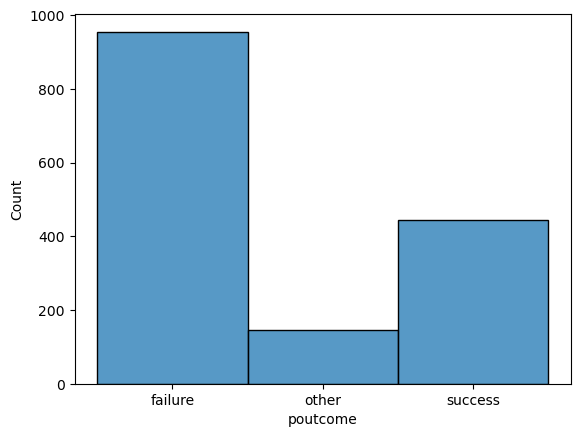

In [355]:
sns.histplot(original_df['poutcome'])

df.fillna({'poutcome': 'other poutcome'}, inplace=True)
print("Sum of NA for contact: ", df['poutcome'].isna().sum())


The reason why I chose to replace NA `poutcome` with `other poutcome` is because that if its missing, its safe to assume that there was no previous contacts made.

In [356]:
non_na_data = df.copy()
df.isna().sum()

age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

## Encode all categorial attributes as numerical

In [357]:
categorical_atts = ["job", "marital", "education", "default", "housing", "loan", "contact", "day", "month", "poutcome", "subscribed"]

ordinal_atts = ["education", "day", "month"]
nominal_atts = ["job", "marital", "default", "housing", "loan", "contact", "poutcome", "subscribed"]

### Ordinal attributes

In [358]:
from sklearn.preprocessing import OrdinalEncoder

def ordinal_encoder(series, ordered_category):
    pandas_categorical = pd.Categorical(series, categories=ordered_category, ordered=True)
    labels, _ = pd.factorize(pandas_categorical, sort=True)
    return labels

sorted_education_categories=['primary', 'secondary', 'tertiary']
sorted_month_categories=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'nov', 'oct', 'dec']

education_labels = ordinal_encoder(df['education'], sorted_education_categories)
months_labels = ordinal_encoder(df['month'], sorted_month_categories)

df['education'] = education_labels
df['month'] = months_labels
df

age           job   marital  education default  balance housing loan  \
0     32.0    technician    single          2      no      392     yes   no   
1     39.0    technician  divorced          1      no      688     yes  yes   
2     59.0       retired   married          1      no     1035     yes  yes   
3     47.0   blue-collar   married          1      no      398     yes  yes   
4     54.0       retired   married          1      no     1004     yes   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
1994  26.0       student    single          1      no      655      no   no   
1996  28.0        admin.    single          1      no      127      no   no   
1997  81.0       retired   married          0      no     1154      no   no   
1998  46.0      services   married          0      no     4343     yes   no   
1999  40.0  entrepreneur   married          1      no     6403      no   no   

        contact  day  month  duration  campaign  pdays  previous  \
0      cellular    1      3       957         2    131         2   
1      cellular    1      3       233         2    133         1   
2      cellular    1      3       126         2    239         1   
3      cellular    1      3       274         1    238         2   
4      cellular    1      3       479         1    307         1   
...         ...  ...    ...       ...       ...    ...       ...   
1994   cellular   16      8       190         1     -1         0   
1996   cellular   16      8      1334         2     -1         0   
1997  telephone   17      8       231         1     -1         0   
1998   cellular   20      8       185         1     -1         0   
1999   cellular   22      8       208         2     -1         0   

            poutcome subscribed  
0            failure         no  
1            failure         no  
2            failure         no  
3            failure         no  
4            failure         no  
...              ...        ...  
1994  other poutcome        yes  
1996  other poutcome        yes  
1997  other poutcome        yes  
1998  other poutcome        yes  
1999  other poutcome        yes  

[1879 rows x 17 columns]

In [359]:
non_na_data

age           job   marital  education default  balance housing loan  \
0     32.0    technician    single   tertiary      no      392     yes   no   
1     39.0    technician  divorced  secondary      no      688     yes  yes   
2     59.0       retired   married  secondary      no     1035     yes  yes   
3     47.0   blue-collar   married  secondary      no      398     yes  yes   
4     54.0       retired   married  secondary      no     1004     yes   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
1994  26.0       student    single  secondary      no      655      no   no   
1996  28.0        admin.    single  secondary      no      127      no   no   
1997  81.0       retired   married    primary      no     1154      no   no   
1998  46.0      services   married    primary      no     4343     yes   no   
1999  40.0  entrepreneur   married  secondary      no     6403      no   no   

        contact  day month  duration  campaign  pdays  previous  \
0      cellular    1   apr       957         2    131         2   
1      cellular    1   apr       233         2    133         1   
2      cellular    1   apr       126         2    239         1   
3      cellular    1   apr       274         1    238         2   
4      cellular    1   apr       479         1    307         1   
...         ...  ...   ...       ...       ...    ...       ...   
1994   cellular   16   sep       190         1     -1         0   
1996   cellular   16   sep      1334         2     -1         0   
1997  telephone   17   sep       231         1     -1         0   
1998   cellular   20   sep       185         1     -1         0   
1999   cellular   22   sep       208         2     -1         0   

            poutcome subscribed  
0            failure         no  
1            failure         no  
2            failure         no  
3            failure         no  
4            failure         no  
...              ...        ...  
1994  other poutcome        yes  
1996  other poutcome        yes  
1997  other poutcome        yes  
1998  other poutcome        yes  
1999  other poutcome        yes  

[1879 rows x 17 columns]

Successfully mapped `education` and `month` attribute.

Primary = 0, Secondary = 1, Tertiary = 2.

jan = 0, feb = 1, mar = 2, etc..

It would be nice if I can get jan = 1, to follow human convention. I'm not mapping `days` because it is already sorted and in numeric format.

### Nominal Categories

In [360]:
nominal_atts = ["job", "marital", "default", "housing", "loan", "contact", "poutcome", "subscribed"]

In [361]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

transformer = make_column_transformer((OneHotEncoder(dtype=np.int32), nominal_atts), remainder='passthrough')

transformed = transformer.fit_transform(df)
transformer.get_feature_names_out()
transformed_df = pd.DataFrame(transformed, columns=transformer.get_feature_names_out())
df = transformed_df
df


onehotencoder__job_admin.  onehotencoder__job_blue-collar  \
0                           0.0                             0.0   
1                           0.0                             0.0   
2                           0.0                             0.0   
3                           0.0                             1.0   
4                           0.0                             0.0   
...                         ...                             ...   
1874                        0.0                             0.0   
1875                        1.0                             0.0   
1876                        0.0                             0.0   
1877                        0.0                             0.0   
1878                        0.0                             0.0   

      onehotencoder__job_entrepreneur  onehotencoder__job_housemaid  \
0                                 0.0                           0.0   
1                                 0.0                           0.0   
2                                 0.0                           0.0   
3                                 0.0                           0.0   
4                                 0.0                           0.0   
...                               ...                           ...   
1874                              0.0                           0.0   
1875                              0.0                           0.0   
1876                              0.0                           0.0   
1877                              0.0                           0.0   
1878                              1.0                           0.0   

      onehotencoder__job_management  onehotencoder__job_retired  \
0                               0.0                         0.0   
1                               0.0                         0.0   
2                               0.0                         1.0   
3                               0.0                         0.0   
4                               0.0                         1.0   
...                             ...                         ...   
1874                            0.0                         0.0   
1875                            0.0                         0.0   
1876                            0.0                         1.0   
1877                            0.0                         0.0   
1878                            0.0                         0.0   

      onehotencoder__job_self-employed  onehotencoder__job_services  \
0                                  0.0                          0.0   
1                                  0.0                          0.0   
2                                  0.0                          0.0   
3                                  0.0                          0.0   
4                                  0.0                          0.0   
...                                ...                          ...   
1874                               0.0                          0.0   
1875                               0.0                          0.0   
1876                               0.0                          0.0   
1877                               0.0                          1.0   
1878                               0.0                          0.0   

      onehotencoder__job_student  onehotencoder__job_technician  ...  \
0                            0.0                            1.0  ...   
1                            0.0                            1.0  ...   
2                            0.0                            0.0  ...   
3                            0.0                            0.0  ...   
4                            0.0                            0.0  ...   
...                          ...                            ...  ...   
1874                         1.0                            0.0  ...   
1875                         0.0                            0.0  ...   
1876                         0.0          

Successfully encode ordinal and nominal categorical data. Although there is `remainder__` prefix to the other column names, I don't think it is a big deal. So, I won't reconstruct a new dataframe for this issue.

# Rescale Feature

In [362]:
df.drop(df[(df.remainder__balance > 70000)].index, inplace=True)
robust_scaler = RobustScaler()
df[['remainder__balance', 'remainder__duration', 'remainder__campaign',
    'remainder__pdays', 'remainder__previous', 'remainder__age']] = robust_scaler.fit_transform(df[['remainder__balance', 'remainder__duration', 'remainder__campaign', 'remainder__pdays', 'remainder__previous', 'remainder__age']])
df

onehotencoder__job_admin.  onehotencoder__job_blue-collar  \
0                           0.0                             0.0   
1                           0.0                             0.0   
2                           0.0                             0.0   
3                           0.0                             1.0   
4                           0.0                             0.0   
...                         ...                             ...   
1874                        0.0                             0.0   
1875                        1.0                             0.0   
1876                        0.0                             0.0   
1877                        0.0                             0.0   
1878                        0.0                             0.0   

      onehotencoder__job_entrepreneur  onehotencoder__job_housemaid  \
0                                 0.0                           0.0   
1                                 0.0                           0.0   
2                                 0.0                           0.0   
3                                 0.0                           0.0   
4                                 0.0                           0.0   
...                               ...                           ...   
1874                              0.0                           0.0   
1875                              0.0                           0.0   
1876                              0.0                           0.0   
1877                              0.0                           0.0   
1878                              1.0                           0.0   

      onehotencoder__job_management  onehotencoder__job_retired  \
0                               0.0                         0.0   
1                               0.0                         0.0   
2                               0.0                         1.0   
3                               0.0                         0.0   
4                               0.0                         1.0   
...                             ...                         ...   
1874                            0.0                         0.0   
1875                            0.0                         0.0   
1876                            0.0                         1.0   
1877                            0.0                         0.0   
1878                            0.0                         0.0   

      onehotencoder__job_self-employed  onehotencoder__job_services  \
0                                  0.0                          0.0   
1                                  0.0                          0.0   
2                                  0.0                          0.0   
3                                  0.0                          0.0   
4                                  0.0                          0.0   
...                                ...                          ...   
1874                               0.0                          0.0   
1875                               0.0                          0.0   
1876                               0.0                          0.0   
1877                               0.0                          1.0   
1878                               0.0                          0.0   

      onehotencoder__job_student  onehotencoder__job_technician  ...  \
0                            0.0                            1.0  ...   
1                            0.0                            1.0  ...   
2                            0.0                            0.0  ...   
3                            0.0                            0.0  ...   
4                            0.0                            0.0  ...   
...                          ...                            ...  ...   
1874                         1.0                            0.0  ...   
1875                         0.0                            0.0  ...   
1876                         0.0          

In [363]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
df[['remainder__day']] = min_max_scaler.fit_transform(df[['remainder__day']])

In [364]:
plt.figure(figsize=(20,60), facecolor='white')

num_col = ['remainder__balance', 'remainder__day', 'remainder__duration', 'remainder__campaign', 'remainder__pdays', 'remainder__previous', 'remainder__month']

plotnumber = 1
for col in num_col:
    ax = plt.subplot(12,3,plotnumber)
    sns.histplot(df[col], kde=True)

    plt.xlabel(col)
    plotnumber+=1
plt.show()

I first drop the outlier of 80,000 `balance` because it is a very obvious outlier.

I have chosen `RobustScaler` for attributes that contains outliers, since it perform better if outliers are present. Then I used `MinMaxScaler()` for the `day` attribute because it doesn't have any outliers and I want to maintain the shape of the data.

# Outlier Treatments

From the previous etivity, we can see that the following attributes contains outliers `balance`, `age`, `duration`, `pdays`, `previous`, and `campaign`. From the box plot we can see there were a lot of points outside the whiskers.

In [365]:
column_with_outliers = ['balance', "age", "duration", "pdays", "previous", "campaign"]

### `Balance`, `Duration`, `Age`

Text(0, 0.5, 'Count')

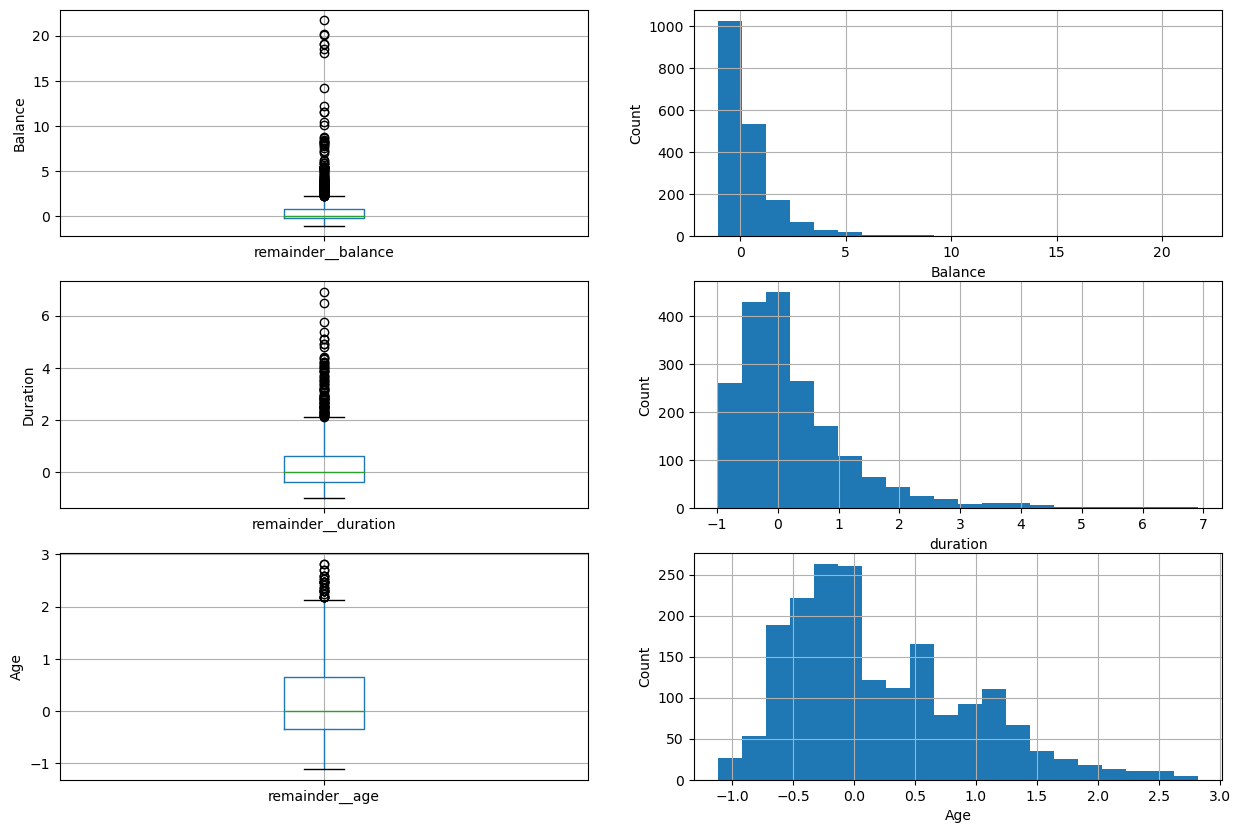

In [366]:
plt.figure(figsize=(15, 10), facecolor='white')

ax = plt.subplot(3,2,1)
plot = df.boxplot(column='remainder__balance')
ax.set_ylabel('Balance')

ax = plt.subplot(3,2,2)
df['remainder__balance'].hist(bins=20)
ax.set_xlabel('Balance')
ax.set_ylabel('Count')

ax = plt.subplot(3,2,3)
plot = df.boxplot(column='remainder__duration')
ax.set_ylabel('Duration')

ax = plt.subplot(3,2,4)
df['remainder__duration'].hist(bins=20)
ax.set_xlabel('duration')
ax.set_ylabel('Count')

ax = plt.subplot(3,2,5)
plot = df.boxplot(column='remainder__age')
ax.set_ylabel('Age')

ax = plt.subplot(3,2,6)
df['remainder__age'].hist(bins=20)
ax.set_xlabel('Age')
ax.set_ylabel('Count')

In [367]:
df[['remainder__balance']].min()
df[['remainder__duration']].min()
df[['remainder__age']].min()


remainder__age   -1.117647
dtype: float64

In [368]:
df['remainder__balance'] = np.log(df['remainder__balance']+3)
df['remainder__duration'] = np.log(df['remainder__duration']+3)
df['remainder__age'] = np.log(df['remainder__age']+3)

plt.figure(figsize=(15, 10), facecolor='white')

ax = plt.subplot(2,2,1)
df['remainder__balance'].hist(bins=20)
ax.set_xlabel('Balance')
ax.set_ylabel('Count')

ax = plt.subplot(2,2,2)
df['remainder__duration'].hist(bins=20)
ax.set_xlabel('Duration')
ax.set_ylabel('Count')

ax = plt.subplot(2,2,3)
df['remainder__age'].hist()
ax.set_xlabel('Age')
ax.set_ylabel('Count')

Text(0, 0.5, 'Count')

### `Previous` and `Campaign`

In [369]:
df['remainder__previous'].value_counts()

-1.0     421
-0.5     409
 0.0     380
 0.5     229
 1.0     144
 1.5      80
 2.0      56
 2.5      41
 3.0      31
 3.5      20
 4.0      19
 4.5      10
 5.0       8
 5.5       8
 6.0       7
 10.5      2
 6.5       2
 7.0       2
 7.5       2
 12.5      1
 18.0      1
 13.5      1
 24.5      1
 9.0       1
 26.5      1
 8.5       1
Name: remainder__previous, dtype: int64

In [370]:
df['remainder__campaign'].value_counts()


0.0     1001
1.0      473
2.0      204
3.0       94
4.0       47
5.0       30
6.0       16
7.0        5
8.0        5
10.0       2
9.0        1
Name: remainder__campaign, dtype: int64

In [371]:
sns.boxplot(df['remainder__previous'])

c:\Users\henry\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='remainder__previous'>

c:\Users\henry\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='remainder__campaign'>

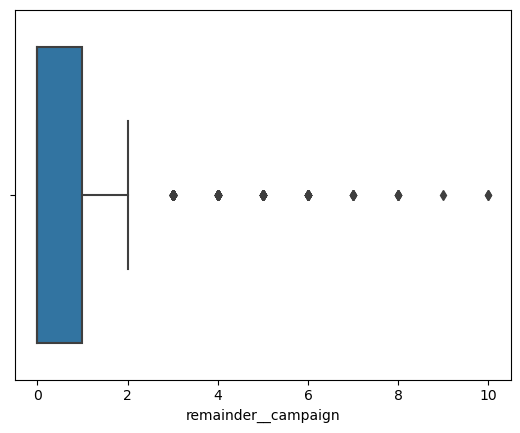

In [372]:
sns.boxplot(df['remainder__campaign'])

<AxesSubplot:xlabel='remainder__campaign', ylabel='Count'>

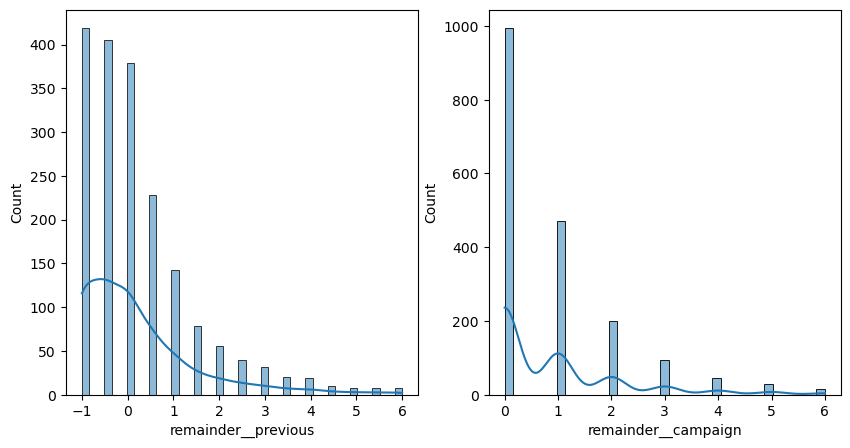

In [373]:
plt.figure(figsize=(10, 5))
df.drop(df[df['remainder__previous'] >= 6.5].index, inplace = True)
df.drop(df[df['remainder__campaign'] >= 7].index, inplace = True)

ax = plt.subplot(1, 2, 1)
sns.histplot(df['remainder__previous'], kde=True)

ax = plt.subplot(1, 2, 2)
sns.histplot(df['remainder__campaign'], kde=True)

Strategy here is to remove values that have little count in them. For example, in `campaign` value_count, there are very little counts for values greater and equal to 7.

### `pdays`

c:\Users\henry\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='remainder__pdays'>

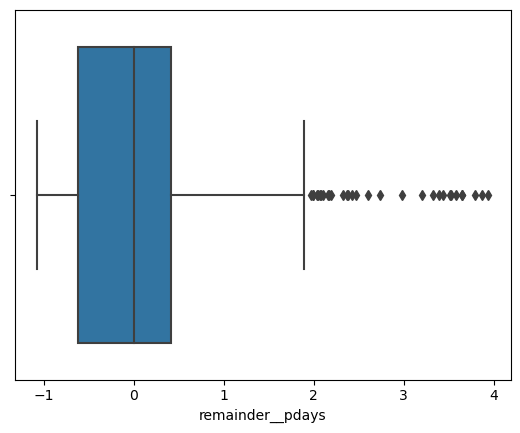

In [374]:
sns.boxplot(df['remainder__pdays'])

In [375]:
df['remainder__pdays'].hist()

<AxesSubplot:>

c:\Users\henry\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='remainder__pdays', ylabel='Count'>

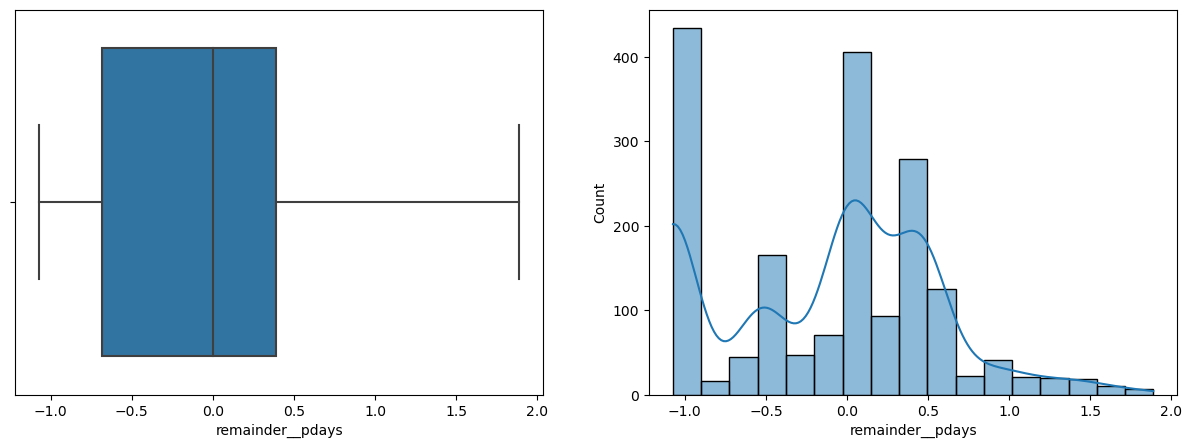

In [377]:
q1 = df['remainder__pdays'].quantile(0.25)
q3 = df['remainder__pdays'].quantile(0.75)
iqr = q3 - q1

df.drop(df[(df['remainder__pdays'] >= q3 + 1.5 * iqr)].index, inplace = True)

plt.figure(figsize=(15, 5))
ax = plt.subplot(1, 2, 1)
sns.boxplot(df['remainder__pdays'])

ax = plt.subplot(1, 2, 2)
sns.histplot(df['remainder__pdays'], kde=True)